In [1]:
import numpy as np
import pandas as pd

In [2]:
file_path = "../data/IMDB Dataset.csv"
df = pd.read_csv(file_path)
print("Successfully loaded dataset into pandas")

Successfully loaded dataset into pandas


Inspecting the DataFrame

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# checking the DataFrame
df.shape

(50000, 2)

In [5]:
# checking the missing values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
# Analyzing the distribution of sentiment
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Visualizing the distribution of sentiment

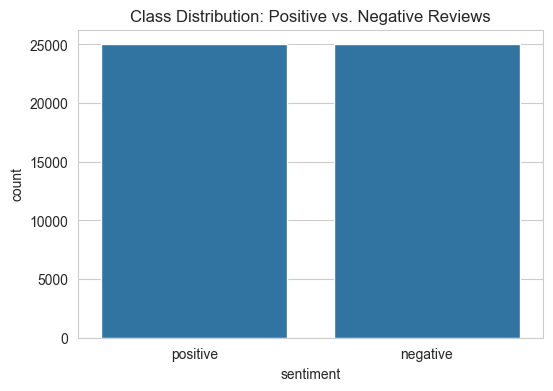

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize = (6,4))
sns.countplot(x='sentiment', data=df)

plt.title('Class Distribution: Positive vs. Negative Reviews')
plt.show()

#### **Step-2 : Text Preprocessing**

In [8]:
from preprocessing import to_lowercase, remove_html_tags, remove_punctuation

df["review"] = df["review"].apply(to_lowercase)
df["review"] = df["review"].apply(remove_html_tags)
df["review"] = df["review"].apply(remove_punctuation)

In [9]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there s a family where a little boy ...,negative
4,petter mattei s love in the time of money is...,positive


NLTK stopwords for text preprocessing

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\G Ajay
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Loading NLTK stopwords into a set

In [11]:
from nltk.corpus import stopwords
english_stopwords_list = stopwords.words('english')
print("--- First 10 Stopwords from NLTK List ---")
print(english_stopwords_list[:10])
print("\n" + "="*50 + "\n")
stop_words_set = set(english_stopwords_list)
print(f"We have successfully loaded {len(stop_words_set)} English stopwords into a highly efficient set.")

--- First 10 Stopwords from NLTK List ---
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']


We have successfully loaded 198 English stopwords into a highly efficient set.


Tokenize and remove stopwords

In [12]:
def tokenize_and_remove_stopwords(text):
    # tokenize text
    tokens = text.split()
    # Filter out stopwords
    cleaned_tokens = [token for token in tokens if token not in stop_words_set]

    return cleaned_tokens 

In [13]:
df['review'] = df['review'].apply(tokenize_and_remove_stopwords)
print("DataFrame after tokenization and stopword removal:")
df.head()

DataFrame after tokenization and stopword removal:


,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, family, little, boy, jake, thinks,...",negative
4,"[petter, mattei, love, time, money, visually, ...",positive


NLTK WordNet for Lemmatization

In [14]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\G Ajay
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
from nltk.stem import WordNetLemmatizer
# Create an instance of the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [16]:
df['review'] = df['review'].apply(lemmatize_tokens)
print("DataFrame after applying the lemmatization function:")
df.head()

DataFrame after applying the lemmatization function:


,review,sentiment
0,"[one, reviewer, mentioned, watching, 1, oz, ep...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, family, little, boy, jake, think, ...",negative
4,"[petter, mattei, love, time, money, visually, ...",positive


Join word tokens into a single string

In [17]:
def join_tokens(tokens):

    return ' '.join(tokens)

In [18]:
df['cleaned_review'] = df['review'].apply(join_tokens)
print("DataFrame after final cleaning and rejoining tokens:")
df[['review', 'cleaned_review', 'sentiment']].head()

DataFrame after final cleaning and rejoining tokens:


,review,cleaned_review,sentiment
0,"[one, reviewer, mentioned, watching, 1, oz, ep...",one reviewer mentioned watching 1 oz episode h...,positive
1,"[wonderful, little, production, filming, techn...",wonderful little production filming technique ...,positive
2,"[thought, wonderful, way, spend, time, hot, su...",thought wonderful way spend time hot summer we...,positive
3,"[basically, family, little, boy, jake, think, ...",basically family little boy jake think zombie ...,negative
4,"[petter, mattei, love, time, money, visually, ...",petter mattei love time money visually stunnin...,positive


#### **Step-3 : Feature Engineering (vectorization)**

Define features (X) and Target (y) variables for Machine learning

In [19]:
X = df['cleaned_review']
y = df['sentiment']
print("--- Features (X) ---")
print(X.head())
print("\n" + "="*50 + "\n")
print("--- Target (y) ---")
print(y.head())

--- Features (X) ---
0    one reviewer mentioned watching 1 oz episode h...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake think zombie ...
4    petter mattei love time money visually stunnin...
Name: cleaned_review, dtype: object


--- Target (y) ---
0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object


Splitting the dataset into train and test set

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Shapes of train and test datasets

In [21]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (40000,)
Shape of X_test: (10000,)
Shape of y_train: (40000,)
Shape of y_test: (10000,)


TF-IDF vectorizer for feature extraction

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer

,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None
,"analyzer analyzer: {'word', 'char', 'char_wb'} or callable, default='word'Whether the feature should be made of word or character n-grams.Option 'char_wb' creates character n-grams only from text insideword boundaries; n-grams at the edges of words are padded with space.If a callable is passed it is used to extract the sequence of featuresout of the raw, unprocessed input... versionchanged:: 0.21 Since v0.21, if ``input`` is ``'filename'`` or ``'file'``, the data is first read from the file and then passed to the given callable analyzer.",'word'
,"stop_words stop_words: {'english'}, list, default=NoneIf a string, it is passed to _check_stop_list and the appropriate stoplist is returned. 'english' is currently the only supported stringvalue.There are several known issues with 'english' and you shouldconsider an alternative (see :ref:`stop_words`).If a list, that list is assumed to contain stop words, all of whichwill be removed from the resulting tokens.Only applies if ``analyzer == 'word'``.If None, no stop words will be used. In this case, setting `max_df`to a higher value, such as in the range (0.7, 1.0), can automatically detectand filter stop words based on intra corpus document frequency of terms.",None
,"token_pattern token_pattern: str, default=r""(?u)\\b\\w\\w+\\b""Regular expression denoting what constitutes a ""token"", only usedif ``analyzer == 'word'``. The default regexp selects tokens of 2or more alphanumeric characters (punctuation is completely ignoredand always treated as a token separator).If there is a capturing group in token_pattern then thecaptured group content, not the entire match, becomes the token.At most one capturing group is permitted.",'(?u)\\b\\w\\w+\\b'
,"ngram_range ngram_range: tuple (min_n, max_n), default=(1, 1)The lower and upper boundary of the range of n-values for differentn-grams to be extracted. All values of n such that min_n <= n <= max_nwill be used. For example an ``ngram_range`` of ``(1, 1)`` means onlyunigrams, ``(1, 2)`` means unigrams and bigrams, and ``(2, 2)`` meansonly bigrams.Only applies if ``analyzer`` is not callable.","(1

In [23]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shape of the TF-IDF training data matrix (X_train_tfidf):", X_train_tfidf.shape)
print("Shape of the TF-IDF testing data matrix (X_test_tfidf):", X_test_tfidf.shape)

Shape of the TF-IDF training data matrix (X_train_tfidf): (40000, 10000)
Shape of the TF-IDF testing data matrix (X_test_tfidf): (10000, 10000)


#### **Step-4 : Model Training & Evaluation**

Choosing base Models for model (Logistic regression)

In [24]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state = 42)
lr_model.fit(X_train_tfidf, y_train)
lr_model

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

making predictions for logistic regression

In [25]:
y_pred = lr_model.predict(X_test_tfidf)

In [26]:
print("First 20 predictions made by the model:")
print(y_pred[:20])

print("\n" + "="*50 + "\n")
print("Comparison of first 5 Predictions vs. Actual Labels:")
print("Predictions:", y_pred[:5])
print("Actuals:    ", y_test.values[:5])

First 20 predictions made by the model:
['negative' 'negative' 'positive' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'positive'
 'positive' 'negative' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive']


Comparison of first 5 Predictions vs. Actual Labels:
Predictions: ['negative' 'negative' 'positive' 'negative' 'negative']
Actuals:     ['negative' 'negative' 'positive' 'negative' 'negative']


Evaluating the model metrics

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(y_test, y_pred)
print("Classification Report :\n", report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", cm)

Classification Report :
               precision    recall  f1-score   support

    negative       0.90      0.88      0.89      5000
    positive       0.89      0.91      0.90      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix :
 [[4417  583]
 [ 474 4526]]


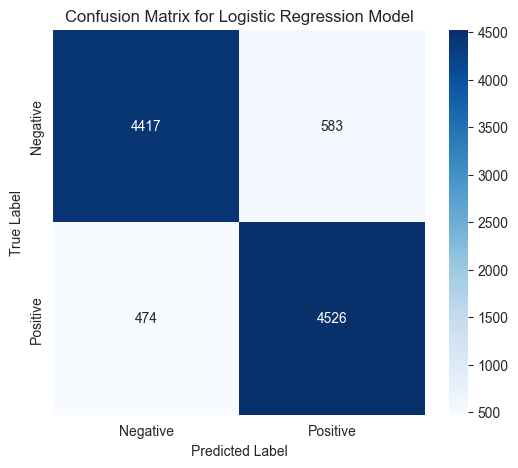

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names = ['Negative', 'Positive']

plt.figure(figsize=(6,5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()